# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

I would first create a column called "profit" by subtracting the bottle cost from the retail sale price and then multipling the difference by the number of bottle sold. 

From there, I would group the column by the Item description and sort that column in descending order. Finally, I would focus on the top 10 liquors in the column

In [2]:
import pandas as pd
import numpy as np

In [4]:
iowa= pd.read_csv("iowa.csv")

In [21]:
iowa["profit"]= (iowa["State Bottle Retail"]- iowa["State Bottle Cost"])* iowa["Bottles Sold"]


In [26]:
iowa_profit = (
    iowa.groupby("Item Description")
    .sum()
    .sort_values(by="profit", ascending=False)
    .head(10)
)


In [22]:
iowa.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),profit
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28,18.10
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12,29.04
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66,46.80
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72,47.28
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00,15.00


2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

x.reshape(1,-1) changes x into a single row with the same number of columns as right now. x.reshape(-1,1) flips thhe array into a single column with the amount of rows as the current number of columns.

In [28]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [29]:
x-y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [ ]:
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [32]:
x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

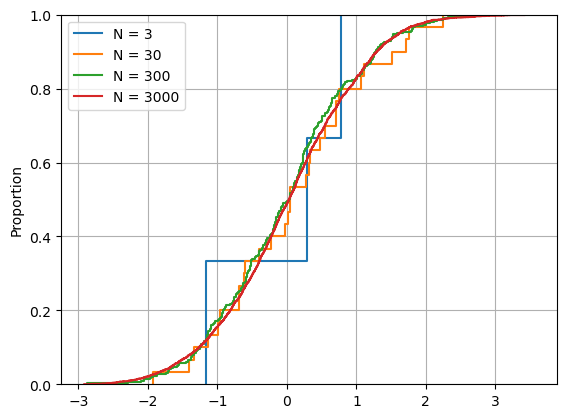

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    sns.ecdfplot(data=X, label=f'N = {N}')
plt.legend()
plt.grid(True)
plt.show()
    


4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [61]:
import statistics
def IQR(x):
    sorted_list=sorted(x)
    median=statistics.median(x)
    if len(x)%2==0:
        Q1= round(statistics.median(sorted_list[:len(x)//2]),2)
        Q3= round(statistics.median(sorted_list[len(x)//2:]),2)
    else:
        Q1=round(statistics.median(sorted_list[:len(x)//2]),2)
        Q3= round(statistics.median(sorted_list[len(x)//2+1:]),2)
    IQR= Q3-Q1
    lower_whisker=round(Q1- 1.5*(IQR),2)
    upper_whisker=round(Q3+ 1.5*(IQR),2)
    quartile_i= { "Q1" : Q1,
                 "Q3": Q3,
                 "Whiskers": (lower_whisker, upper_whisker)
                

    }
    return quartile_i



In [62]:
profit=iowa["profit"].tolist()



In [63]:
iqr=IQR(profit)
print(iqr)

{'Q1': 12.18, 'Q3': 51.0, 'Whiskers': (-46.05, 109.23)}


Five Number Summary

In [68]:
def five_summary(x):
    sorted_list=sorted(x)
    minimum=sorted_list[0]
    maximum=sorted_list[-1]
    median=statistics.median(x)
    iqr= IQR(x)
    five_sum=[]
    five_sum.append(["Minimum",minimum])
    five_sum.append(["Q1:",iqr["Q1"]])
    five_sum.append(["Median",median])
    five_sum.append(["Q3",iqr["Q3"]])
    five_sum.append(["Maximum",maximum])
    return five_sum

    

In [69]:
five_sum=five_summary(profit)
print(five_sum)

[['Minimum', -543.0], ['Q1:', 12.18], ['Median', 26.219999999999995], ['Q3', 51.0], ['Maximum', 12240.0]]


Is Outlier?

In [72]:
def is_outlier (x):
    iqr= IQR(x)
    lower_whisker= iqr["Whiskers"][0]
    upper_whisker= iqr["Whiskers"][1]
    outliers=[]
    for i in x:
        if i<lower_whisker or i>upper_whisker:
            outliers.append(True)
        else:
            outliers.append(False)
    return outliers

In [73]:
is_outlier(profit)

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 F

Comparing to boxplot and describe

In [74]:
iowa["profit"].describe()

count    159904.000000
mean         49.078793
std         153.467941
min        -543.000000
25%          12.180000
50%          26.220000
75%          51.000000
max       12240.000000
Name: profit, dtype: float64

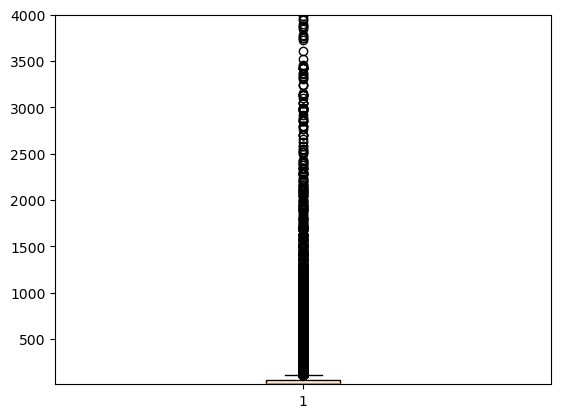

In [78]:
plt.boxplot(iowa["profit"])
plt.ylim(10, 4000)
plt.show()

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?